In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
act_ca = pd.read_csv('data/act_2019_ca.csv')
sat_ca = pd.read_csv('data/sat_2019_ca.csv')
districts = pd.read_csv('data/pubdistricts.txt', sep = '\t')

Clean data

In [36]:
# Last row is empty
# print(act_ca.iloc[2309])
# act_ca.drop(index = 2309, inplace = True)

### County, district, school sizes

In [3]:
act_ca.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
RType,,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,57,57,57,57,57,57,58,0
D,522,522,522,0,0,522,522,522,522,459,459,459,459,459,459,522,0
S,1728,1728,1728,1728,1728,1728,1728,1728,1728,1436,1436,1436,1436,1436,1436,1728,0
X,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [4]:
sat_ca.groupby('RType').count()

,CDS,CCode,CDCode,SCode,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
RType,,,,,,,,,,,,,,,,,,,,,
C,58,58,58,58,0,0,58,58,58,57,...,57,57,57,57,57,57,57,57,58,0
D,539,539,539,539,0,539,539,539,539,501,...,495,495,495,495,501,501,495,495,539,0
S,1981,1981,1981,1981,1981,1981,1981,1981,1981,1745,...,1716,1716,1716,1716,1745,1745,1716,1716,1981,0
X,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


In [38]:
act_ca = act_ca[act_ca['CDS'].notna()]
sat_ca = sat_ca[sat_ca['CDS'].notna()]

In [5]:
print(districts.shape)
districts.sample(5)

(1088, 24)


,CD Code,County,District,Street,City,Zip,State,MailStreet,MailCity,MailZip,...,Email,AdmFName,AdmLName,AdmEmail,Latitude,Longitude,DOC,DOCType,StatusType,LastUpDate
125,1075127,Fresno,Mendota Unified,115 McCabe Avenue,Mendota,93640-2000,CA,115 McCabe Avenue,Mendota,93640-2000,...,No Data,Paul,Lopez,plopez@mendotaschools.org,36.761094,-120.38701,54,Unified School District,Active,08/17/2015
794,4369583,Santa Clara,Morgan Hill Unified,15600 Concord Circle,Morgan Hill,95037-7110,CA,15600 Concord Circle,Morgan Hill,95037-7110,...,No Data,Carmen,Garcia,garciacarmen@mhusd.org,37.111744,-121.63501,54,Unified School District,Active,07/28/2021
748,4169088,San Mateo,Woodside Elementary,3195 Woodside Road,Woodside,94062-2552,CA,3195 Woodside Road,Woodside,94062-2552,...,cstienstra@woodsideschool.us,Steven,Frank,sfrank@woodsideschool.us,37.427582,-122.25839,52,Elementary School District,Active,09/30/2019
1047,5572371,Tuolumne,Sonora Elementary,830 Greenley Road,Sonora,95370-5203,CA,830 Greenley Road,Sonora,95370-5203,...,tbeall@sesk12.org,Tami,Beall,tbeall@sesk12.org,37.979274,-120.36912,52,Elementary School District,Active,08/17/2021
167,1263040,Humboldt,Southern Humboldt Joint Unified,110 School Road,Miranda,95553,CA,PO Box 650,Miranda,95553-0650,...,vanessa@sohumusd.com,Stephanie,Steffano-Davis,supt@sohumusd.com,40.236100,-123.82300,54,Unified School District,Active,05/12/2021


Should be 1088 districts - only half take either SAT's or ACTs.

In [6]:
# But some districts have no high schools 
districts.iloc[543]

CD Code                          3166910
County                            Placer
District       Roseville City Elementary
Street                  1050 Main Street
City                           Roseville
Zip                           95678-2067
State                                 CA
MailStreet              1050 Main Street
MailCity                       Roseville
MailZip                       95678-2067
MailState                             CA
Phone                     (916) 771-1600
Ext                              No Data
FaxNumber                 (916) 771-1620
Email                            No Data
AdmFName                            Derk
AdmLName                          Garcia
AdmEmail              dgarcia@rcsdk8.org
Latitude                       38.751856
Longitude                      -121.3046
DOC                                   52
DOCType       Elementary School District
StatusType                        Active
LastUpDate                    02/10/2020
Name: 543, dtype

In [61]:
act_ca.set_index('CDS', inplace=True)
sat_ca.set_index('CDS', inplace = True)

In [71]:
act_size = act_ca[[]]
sat_size = sat_ca[['RType', 'Enroll12', 'Enroll11']]

In [79]:
act_size.shape, sat_size.shape

((2309, 0), (2579, 3))

In [80]:
df_all = pd.merge(act_size, sat_size, how = 'outer', 
                    left_index=True, right_index = True,
                    indicator=True) 
                    # entities with either act or sat
df_both = pd.merge(act_size, sat_size, how = 'inner',
                    left_index=True, right_index = True) # entities with both act and Sat

In [81]:
df_all.head()
# df_both.head()

,RType,Enroll12,Enroll11,_merge
CDS,,,,
0.000000e+00,X,489650.0,474843.0,both
1.000000e+12,C,17567.0,17191.0,both
1.100170e+12,D,170.0,175.0,both
1.100170e+12,S,84.0,92.0,both
1.100170e+12,S,9.0,16.0,right_only


In [85]:
df_all = df_all.combine_first(act_ca[['RType', 'Enroll12']]) 
# fill RType and Enroll12 columns

In [10]:
# ~df_all[df_all['Enroll12_x'] != df_all['Enroll12_y']].isna().any(axis = 1).any() 
# Enrollment numbers agree

In [86]:
# 280 entities are ACT only, 10 are SAT only
df_all['_merge'].value_counts()

both          2300
right_only     279
left_only        9
Name: _merge, dtype: int64

In [87]:
df_all.groupby(['_merge']).count()

,Enroll11,Enroll12,RType
_merge,,,
left_only,0,9,9
right_only,279,279,279
both,2300,2300,2300


In [88]:
df_all.groupby('_merge').mean()

,Enroll11,Enroll12
_merge,,
left_only,NaN,42.555556
right_only,41.774194,63.172043
both,814.455217,831.246957


(array([ 34.,  81., 425., 784., 971., 220.,  48.,  11.,   4.,   1.]),
 array([ 0.        ,  1.31014482,  2.62028963,  3.93043445,  5.24057927,
         6.55072409,  7.8608689 ,  9.17101372, 10.48115854, 11.79130335,
        13.10144817]),
 <BarContainer object of 10 artists>)

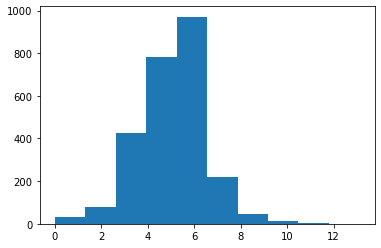

In [ ]:
plt.hist(np.log(df_all['Enroll12_y'] + 1))

<AxesSubplot:>

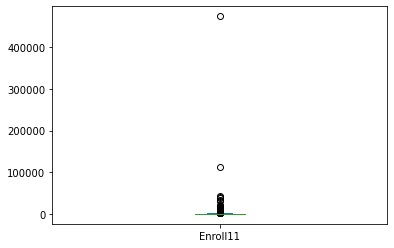

In [ ]:
df_all['Enroll11'].plot(kind = 'box')

In [ ]:
df_districts = df_all.query('RType_x == "D"')
df_districts.shape

(522, 6)

(array([ 35.,  41.,  77., 103.,  93.,  92.,  60.,  18.,   2.,   1.]),
 array([ 2.63905733,  3.43939364,  4.23972994,  5.04006625,  5.84040255,
         6.64073886,  7.44107516,  8.24141147,  9.04174778,  9.84208408,
        10.64242039]),
 <BarContainer object of 10 artists>)

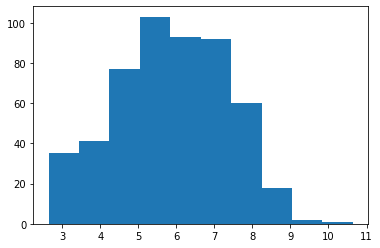

In [ ]:
plt.hist(np.log(df_districts['Enroll12_y'] + 1))

<AxesSubplot:>

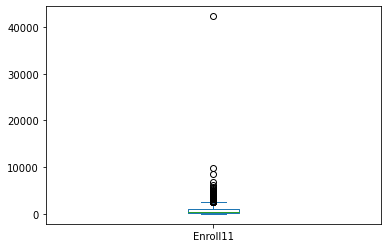

In [ ]:
df_districts['Enroll11'].plot(kind = 'box')

In [ ]:
np.exp([2.64, 8.24, 10.64])

array([1.40132036e+01, 3.78954031e+03, 4.17727712e+04])

Size is very inhomogeneous - even when we filter to only districts. Districts vary from 14 to more than 40,000 students.

(array([ 35.,  41.,  77., 103.,  93.,  92.,  60.,  18.,   2.,   1.]),
 array([ 2.63905733,  3.43939364,  4.23972994,  5.04006625,  5.84040255,
         6.64073886,  7.44107516,  8.24141147,  9.04174778,  9.84208408,
        10.64242039]),
 <BarContainer object of 10 artists>)

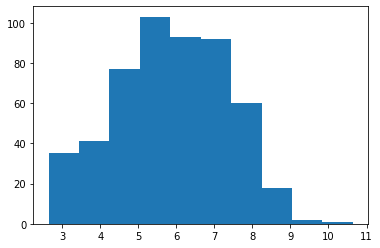

In [ ]:
plt.hist(np.log(df_all.query('RType_x == "D"')['Enroll12_y'] + 1))

(array([  5.,   5.,  82., 134., 187., 268., 237., 240., 470.,  91.]),
 array([1.38629436, 1.95119178, 2.51608921, 3.08098663, 3.64588406,
        4.21078148, 4.7756789 , 5.34057633, 5.90547375, 6.47037118,
        7.0352686 ]),
 <BarContainer object of 10 artists>)

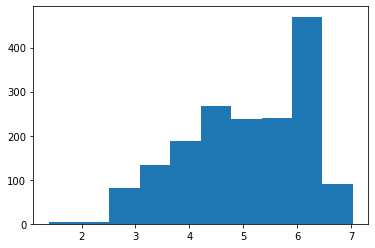

In [ ]:
plt.hist(np.log(df_all.query('RType_x == "S"')['Enroll12_y'] + 1))

### Small Schools

In [ ]:
act_ca.query('NumTstTakr == 0')
# act_ca.drop(index = act_ca.query('NumTstTakr == 0').index, inplace = True) # Drop entities with 0 test takers

,CDS,RType,Enroll12,NumTstTakr,NumGE21,PctGE21,Year
0,3.366993e+13,S,18.0,0.0,NaN,NaN,2018-19
1,1.964212e+13,S,58.0,0.0,NaN,NaN,2018-19
2,1.563776e+13,S,18.0,0.0,NaN,NaN,2018-19
17,5.472249e+13,S,78.0,0.0,NaN,NaN,2018-19
28,1.263032e+13,S,51.0,0.0,NaN,NaN,2018-19
...,...,...,...,...,...,...,...
2285,4.369674e+13,S,140.0,0.0,NaN,NaN,2018-19
2300,1.964733e+13,S,75.0,0.0,NaN,NaN,2018-19
2301,1.410140e+13,S,194.0,0.0,NaN,NaN,2018-19
2305,5.810588e+13,S,102.0,0.0,NaN,NaN,2018-19


In [ ]:
act_ca['is_small_sample'] = act_ca['PctGE21'] == "*"

In [ ]:
act_ca.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,is_small_sample
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,False
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,False
5,1.976968e+13,19.0,1976968.0,109926.0,S,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65.0,33.0,15,15,17,16,3,9.09,2018-19,False
6,1.964733e+13,19.0,1964733.0,126615.0,S,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16.0,18,18,18,17,5,31.25,2018-19,False
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,*,*,*,*,*,*,2018-19,True


In [ ]:
act_ca.query('PctGE21 == "*"')

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
7,1.964246e+13,19.0,1964246.0,126003.0,S,Academies of the Antelope Valley,Antelope Valley Union High,Los Angeles,14.0,1.0,*,*,*,*,*,*,2018-19
8,3.868478e+13,38.0,3868478.0,119958.0,S,Academy (The)- SF @McAteer,San Francisco Unified,San Francisco,84.0,9.0,*,*,*,*,*,*,2018-19
9,3.675077e+13,36.0,3675077.0,3631207.0,S,Academy for Academic Excellence,Apple Valley Unified,San Bernardino,97.0,13.0,*,*,*,*,*,*,2018-19
10,1.964733e+13,19.0,1964733.0,126573.0,S,Academy for Multilingual Arts and Science at M...,Los Angeles Unified,Los Angeles,141.0,10.0,*,*,*,*,*,*,2018-19
11,3.667736e+13,36.0,3667736.0,116723.0,S,Academy of Careers and Exploration,Helendale Elementary,San Bernardino,63.0,5.0,*,*,*,*,*,*,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1.162661e+13,11.0,1162661.0,1132851.0,S,Willows High,Willows Unified,Glenn,115.0,5.0,*,*,*,*,*,*,2018-19
2288,5.772703e+13,57.0,5772702.0,5738505.0,S,Winters High,Winters Joint Unified,Yolo,102.0,6.0,*,*,*,*,*,*,2018-19
2296,4.369427e+13,43.0,4369427.0,4330015.0,S,Yerba Buena High,East Side Union High,Santa Clara,420.0,13.0,*,*,*,*,*,*,2018-19
2304,5.171465e+13,51.0,5171464.0,5130075.0,S,Yuba City Independence Academy,Yuba City Unified,Sutter,21.0,1.0,*,*,*,*,*,*,2018-19


In [ ]:
# act_ca = act_ca[act_ca['PctGE21'] != '*']

In [ ]:
act_raw.sort_values('Enroll12').head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
1103,2.000000e+12,2.0,0.0,0.0,C,NaN,NaN,Alpine,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1854,1.964733e+13,19.0,1964733.0,133280.0,S,PUC Nueva Esperanza Charter Academy,Los Angeles Unified,Los Angeles,0.0,22.0,16,15,17,16,1,4.55,2018-19,NaN
238,3.768213e+13,37.0,3768213.0,3730934.0,S,Campo High (Continuation),Mountain Empire Unified,San Diego,3.0,1.0,*,*,*,*,*,*,2018-19,NaN
336,3.166944e+13,31.0,3166944.0,3130192.0,S,Cold Stream Alternative,Tahoe-Truckee Unified,Placer,3.0,1.0,*,*,*,*,*,*,2018-19,NaN
314,3.768338e+13,37.0,3768338.0,124347.0,S,City Heights Preparatory Charter,San Diego Unified,San Diego,4.0,1.0,*,*,*,*,*,*,2018-19,NaN


Alpine county (https://en.wikipedia.org/wiki/Alpine_County%2C_California) population 1129 has no high school students in the county so we drop it.

In [ ]:
act_ca.drop(index = 1103, inplace=True)

##### Should we drop rows with no students taking test?
These are wanted for particpation metrics but not wanted for performance metrics

In [ ]:
act_ca['PctGE21'].isna().sum()
act_ca['PctGE21'].value_counts(dropna = False)

NaN      356
50.00     22
33.33     10
55.56      9
0.00       9
        ... 
6.56       1
8.00       1
80.81      1
24.53      1
57.58      1
Name: PctGE21, Length: 915, dtype: int64

In [ ]:
act_ca.query('PctGE21 == "*"')['RType'].value_counts()

S    420
D    109
C      3
Name: RType, dtype: int64

In [ ]:
act_ca.query('PctGE21 == "*"').describe()

,CDS,CCode,CDCode,SCode,Enroll12,NumTstTakr
count,5.320000e+02,532.000000,5.320000e+02,4.230000e+02,532.000000,532.000000
mean,3.011130e+13,29.475564,2.994964e+06,1.773292e+06,120.150376,5.364662
std,1.511053e+13,15.082740,1.523225e+06,1.995396e+06,138.146842,4.178966
min,1.611190e+12,1.000000,0.000000e+00,0.000000e+00,3.000000,1.000000
25%,1.964733e+13,19.000000,1.964733e+06,1.205385e+05,41.000000,2.000000
50%,3.266969e+13,32.000000,3.266969e+06,6.312590e+05,77.000000,4.000000
75%,4.024979e+13,40.000000,4.010405e+06,3.482215e+06,145.250000,9.000000
max,5.872737e+13,58.000000,5.872736e+06,6.120893e+06,1268.000000,14.000000
